# Walmart Project

* **We have weekly sales data available for various Walmart outlets. We will use statistical analysis and EDA to come up with various insights and trends that can give the stakeholders a clear perspective on the key business metrics**

* **The stakeholders have also asked to perform predictive modelling to forecast the sales for the next 12 weeks**

## Importing preliminary libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [73]:
df = pd.read_csv("Walmart DataSet.csv")

In [74]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## General Observation

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [77]:
#Number of stores
df["Store"].nunique()

45

In [78]:
for column in df:
    print(f"{column} - ({len(df[column].unique())}) : {df[column].unique()} \n")

Store - (45) : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] 

Date - (143) : ['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-2011' '15-04-2011

## Exploarotry Data Analysis

In [80]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

**Renaming the columns: Converting all column names into small letters for convenience**

In [82]:
df.rename(columns = {"Store" : "store",
                    "Date" : "date",
                    "Weekly_Sales" : "weekly_sales",
                    "Holiday_Flag" : "holiday_flag",
                    "Temperature" : "temperature",
                    "Fuel_Price" : "fuel_price",
                    "CPI" : "cpi",
                    "Unemployment" : "unemployment"}, inplace=True)

In [83]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [84]:
# Changing the data type of date column
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

**Let us verify the number of weeks of sales data available for each store**

In [86]:
df["store"].value_counts().unique()

array([143], dtype=int64)

**We have 143 weeks of data available for each store**

### Statistical Summary

In [89]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
weekly_sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
holiday_flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
fuel_price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
cpi,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


#### Analysis of statistical summary

**weekly_Sales**

- Mean sales 1.046M
- Standard deviation is 564K
- Median is 960K
- Median<mean, hence the data is slightly skewed towards the right
- Min sales is 209.9K and Max sales is 3.81M
- The range from min to first quartile is smaller compared to the range from third quartile to max
- The minimum value is within 2 standard deviations from the mean
- While the maximum value is outside of 3 standard deviations from the mean
- This means there are outliers present outside upper bound

**holiday_flag**

- It's a boolean column
- 0 - no holiday in a given week
- 1 - there is a holiday in a given week
- Clearly, most of the values will be 0 as there are very few holidays compared to working days

**temperature**

- Mean temperature is 60.66
- Standard deviation is 18.44
- Min temperatrue is -2.06 while Max temperature is 100.14
- The range from first quartile to min is bigger compared to the range from third quartile to max
- And median>mean, this suggests the data is left skewed
- Max temperatrue is within 3 standard deviations from the mean while min temperature is beyond 3 standard deviations from the mean, indicating outliers in the lower bound

**fuel_price**

- Mean price is 3.35
- Standard deviation is 0.45
- Min price is 2.47 and max price is 4.46
- Min price is within 2 standard deviations and Max price is within 3 standard deviations from the mean
- Mean is slightly less than the median, hence data is slightly skewed towards the left

**cpi**

- Mean cpi is 171.5
- Standard deviation is 39.35
- Min cpi is 126 and max cpi is 227
- Both Min and Max cpi are within 2 standard deviations from the mean

**unemployment**

- Mean unemployment rate is 7.99~8
- Standard deviation is 1.875
- Min rate is 3.879 and max rate is 14.313
- The Min rate is within 3 standard deviations while max rate is beyond 3 standard deviations from the mean
- Hence, some outliers present outside the upper bound

In [103]:
# Group the data by stores and evaluate mean, min, max, sum and standard deviation of each store
store_groups = df.groupby("store")
store_stats = store_groups.agg({
    'weekly_sales': ['mean', 'std', 'min', 'max', 'sum']
}).round(2)
store_stats

weekly_sales                                                 
              mean        std         min         max           sum
store                                                              
1       1555264.40  155980.77  1316899.31  2387950.20  2.224028e+08
2       1925751.34  237683.69  1650394.44  3436007.68  2.753824e+08
3        402704.44   46319.63   339597.38   605990.41  5.758674e+07
4       2094712.96  266201.44  1762539.30  3676388.98  2.995440e+08
5        318011.81   37737.97   260636.71   507900.07  4.547569e+07
6       1564728.19  212525.86  1261253.18  2727575.18  2.237561e+08
7        570617.31  112585.47   372673.61  1059715.27  8.159828e+07
8        908749.52  106280.83   772539.12  1511641.09  1.299512e+08
9        543980.55   69028.67   452905.22   905324.68  7.778922e+07
10      1899424.57  302262.06  1627707.31  3749057.69  2.716177e+08
11      1356383.12  165833.89  1100418.69  2306265.36  1.939628e+08
12      1009001.61  139166.87   802105.50  1768249.89  1.442872e+08
13      2003620.31  265507.00  1633663.12  3595903.20  2.865177e+08
14      2020978.40  317569.95  1479514.66  3818686.45  2.889999e+08
15       623312.47  120538.65   454183.42  1368318.17  8.913368e+07
16       519247.73   85769.68   368600.00  1004730.69  7.425243e+07
17       893581.39  112162.94   635862.55  1309226.79  1.277821e+08
18      1084718.42  176641.51   540922.94  2027507.15  1.551147e+08
19      1444999.04  191722.64  1181204.53  2678206.42  2.066349e+08
20      2107676.87  275900.56  1761016.51  3766687.43  3.013978e+08
21       756069.08  128752.81   596218.24  1587257.78  1.081179e+08
22      1028501.04  161251.35   774262.28  1962445.04  1.470756e+08
23      1389864.46  249788.04  1016756.10  2734277.10  1.987506e+08
24      1356755.39  167745.68  1057290.41  2386015.75  1.940160e+08
25       706721.53  112976.79   558794.63  1295391.19  1.010612e+08
26      1002911.84  110431.29   809833.21  1573982.47  1.434164e+08
27      1775216.20  239930.14  1263534.86  3078162.08  2.538559e+08
28      1323522.24  181758.97  1079669.11  2026026.39  1.892637e+08
29       539451.43   99120.14   395987.24  1130926.79  7.714155e+07
30       438579.62   22809.67   369722.32   519354.88  6.271689e+07
31      1395901.44  125855.94  1198071.60  2068942.97  1.996139e+08
32      1166568.15  138017.25   955463.84  1959526.96  1.668192e+08
33       259861.69   24132.93   209986.25   331173.51  3.716022e+07
34       966781.56  104630.16   836717.75  1620748.25  1.382498e+08
35       919724.98  211243.46   576332.05  1781866.98  1.315207e+08
36       373511.99   60725.17   270677.98   489372.02  5.341221e+07
37       518900.28   21837.46   451327.61   605791.46  7.420274e+07
38       385731.65   42768.17   303908.81   499267.66  5.515963e+07
39      1450668.13  217466.45  1158698.44  2554482.84  2.074455e+08
40       964128.04  119002.11   764014.75  1648829.18  1.378703e+08
41      1268125.42  187907.16   991941.73  2263722.68  1.813419e+08
42       556403.86   50262.93   428953.60   674919.45  7.956575e+07
43       633324.72   40598.41   505405.85   725043.04  9.056544e+07
44       302748.87   24762.83   241937.11   376233.89  4.329309e+07
45       785981.41  130168.53   617207.58  1682862.03  1.123953e+08

In [117]:
store_stats.columns        #column names

MultiIndex([('weekly_sales', 'mean'),
            ('weekly_sales',  'std'),
            ('weekly_sales',  'min'),
            ('weekly_sales',  'max'),
            ('weekly_sales',  'sum')],
           )

In [119]:
# Renaming the columns in store_stats
store_stats.columns = ["_".join(col).strip() for col in store_stats.columns]

In [121]:
store_stats.head()

,weekly_sales_mean,weekly_sales_std,weekly_sales_min,weekly_sales_max,weekly_sales_sum
store,,,,,
1,1555264.40,155980.77,1316899.31,2387950.20,2.224028e+08
2,1925751.34,237683.69,1650394.44,3436007.68,2.753824e+08
3,402704.44,46319.63,339597.38,605990.41,5.758674e+07
4,2094712.96,266201.44,1762539.30,3676388.98,2.995440e+08
5,318011.81,37737.97,260636.71,507900.07,4.547569e+07


In [123]:
store_stats = store_stats.reset_index()    #Resetting the index for store_stats, so the index starts from 0

In [125]:
store_stats.head()

,store,weekly_sales_mean,weekly_sales_std,weekly_sales_min,weekly_sales_max,weekly_sales_sum
0,1,1555264.40,155980.77,1316899.31,2387950.20,2.224028e+08
1,2,1925751.34,237683.69,1650394.44,3436007.68,2.753824e+08
2,3,402704.44,46319.63,339597.38,605990.41,5.758674e+07
3,4,2094712.96,266201.44,1762539.30,3676388.98,2.995440e+08
4,5,318011.81,37737.97,260636.71,507900.07,4.547569e+07


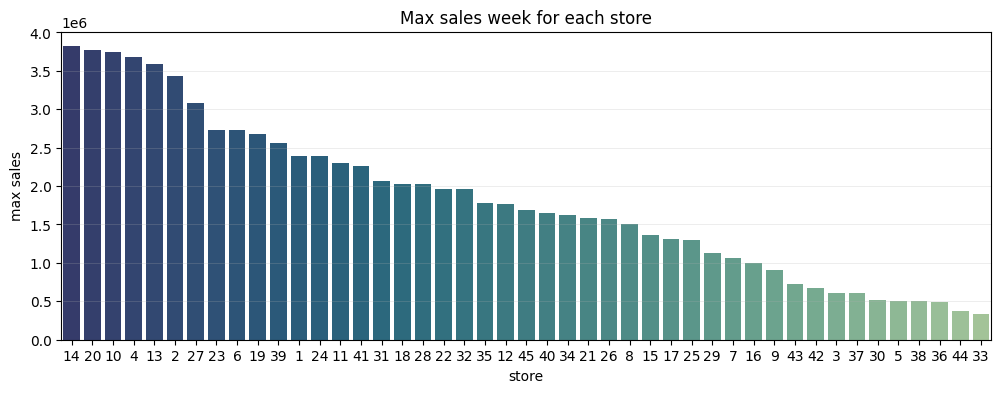

In [127]:
# Visualizing the maximum sales week of each store
plt.figure(figsize=(12,4))
sns.barplot(
    x="store", 
    y="weekly_sales_max", 
    data=store_stats, 
    order=store_stats.sort_values("weekly_sales_max", ascending=False)["store"],
    palette="crest_r"
)
plt.xlabel("store")
plt.ylabel("max sales")
plt.title("Max sales week for each store")
plt.grid(axis="y", alpha=0.4, linewidth=0.4)
plt.show()

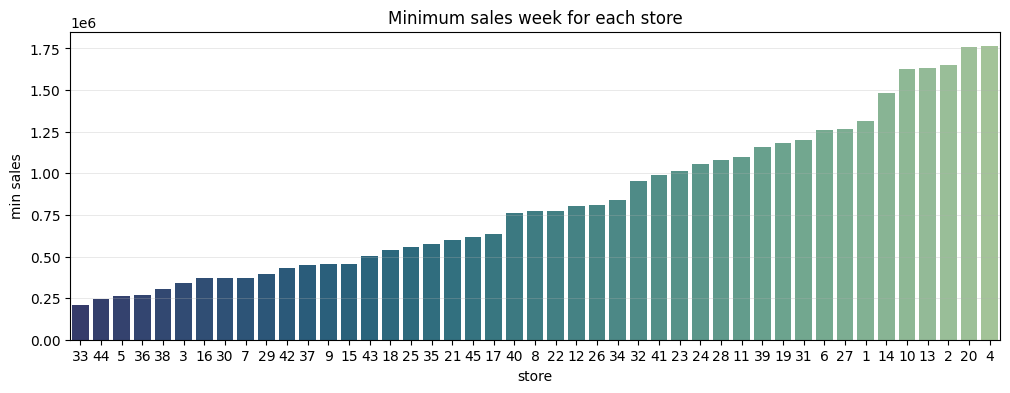

In [129]:
#Visualizing the minimum sales week of each store
plt.figure(figsize=(12,4))
sns.barplot(x="store", 
            y="weekly_sales_min", 
            data=store_stats, 
            order=store_stats.sort_values("weekly_sales_min")["store"],
            palette="crest_r"
           )
plt.xlabel("store")
plt.ylabel("min sales")
plt.title("Minimum sales week for each store")
plt.grid(axis="y", alpha=0.5, linewidth=0.4)
plt.show()

**Store 33 and store 44 have the lowest max sales and the lowest min sales**

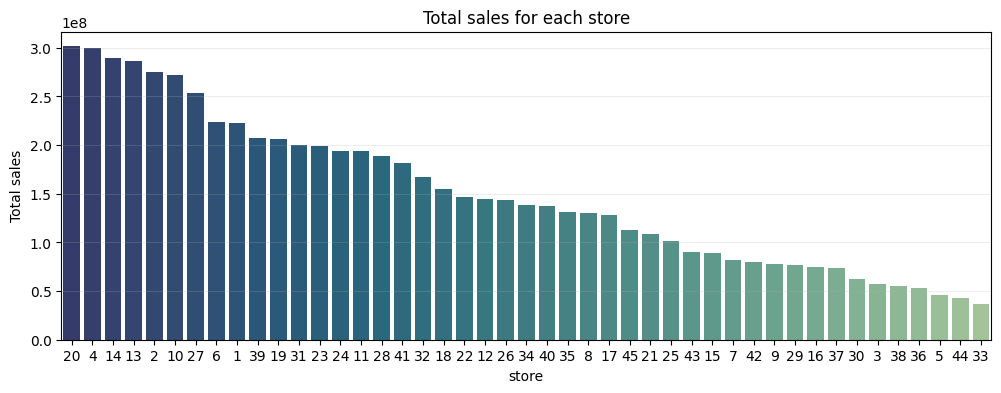

In [143]:
# Visualizing total sales for each store
plt.figure(figsize=(12,4))
sns.barplot(
    x="store", 
    y="weekly_sales_sum", 
    data=store_stats, 
    order=store_stats.sort_values("weekly_sales_sum", ascending=False)["store"], 
    palette="crest_r"
)
plt.xlabel("store")
plt.ylabel("Total sales")
plt.title("Total sales for each store")
plt.grid(axis="y",alpha=0.4, linewidth=0.4)
plt.show()

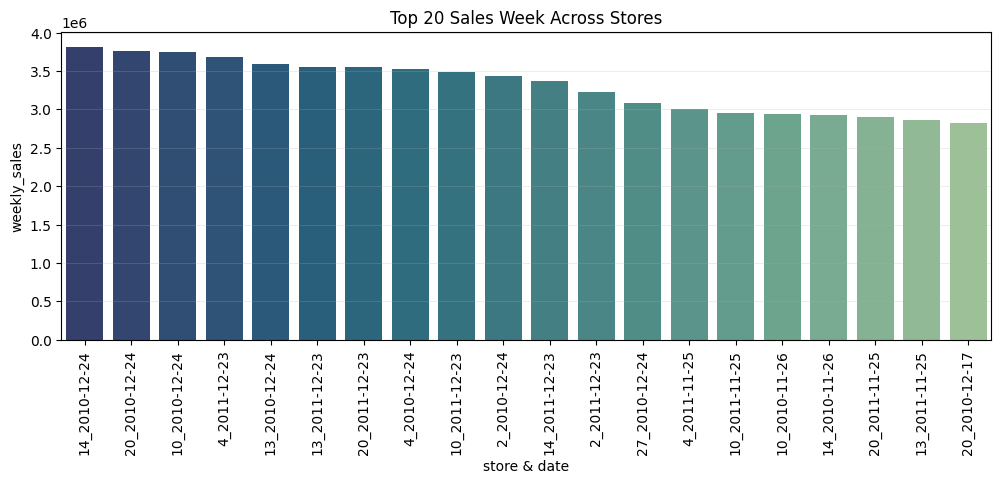

In [148]:
# Visualizing top 20 weekly sales across stores

#Creating a dataframme of top 20 weekly sales
top_20_sales = df[["date", "store","weekly_sales"]].sort_values(
    "weekly_sales", ascending=False
).head(20).reset_index()

# We need the X-axis on the chart to show the store name and the corresponding week
top_20_sales["store_date"] = top_20_sales["store"].astype(str)+"_"+top_20_sales["date"].astype(str)

plt.figure(figsize=(12,4))
sns.barplot(
    x="store_date", 
    y="weekly_sales", 
    data=top_20_sales, 
    palette="crest_r"
)
plt.xlabel("store & date")
plt.ylabel("weekly_sales")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.4, linewidth=0.4)
plt.title("Top 20 Sales Week Across Stores")
plt.show()

- **We can observe that the 20 highest sales recorded are in the month of December and November**
- **In fact, the 13 highest sales are from the month of December and the date is 23rd and 24th**
- **This does not come as a surprise as the sales are going to be at the highest during Christmas holidays**
- **Store 14 recorded the highest sales ever in the week of "2010-12-24"**

In [135]:
top_20_sales["store"].value_counts()

store
20    4
10    4
14    3
4     3
13    3
2     2
27    1
Name: count, dtype: int64

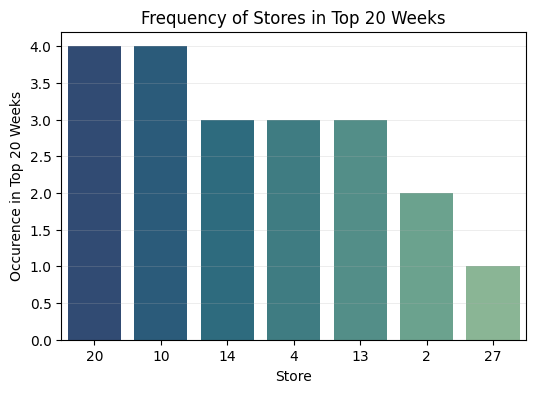

In [137]:
plt.figure(figsize=(6,4))

sns.countplot(
    x=top_20_sales["store"], 
    order=top_20_sales["store"].value_counts().index,
    palette="crest_r"
)
plt.xlabel("Store")
plt.ylabel("Occurence in Top 20 Weeks")
plt.title("Frequency of Stores in Top 20 Weeks")
plt.grid(axis="y", alpha=0.4, linewidth=0.4)
plt.show()

- **stores 20 and store 10 are repeated 4 times in the top 20 weeks**
- **Stores 20 also has the highest total sales and store 10 is ranked 6th in the highest total sales**
- **stores 4 and 14 are repeated 3 times in the top 20 weeks**
- **These stores and also ranked 2nd and 3rd respectively in the highest total sales**

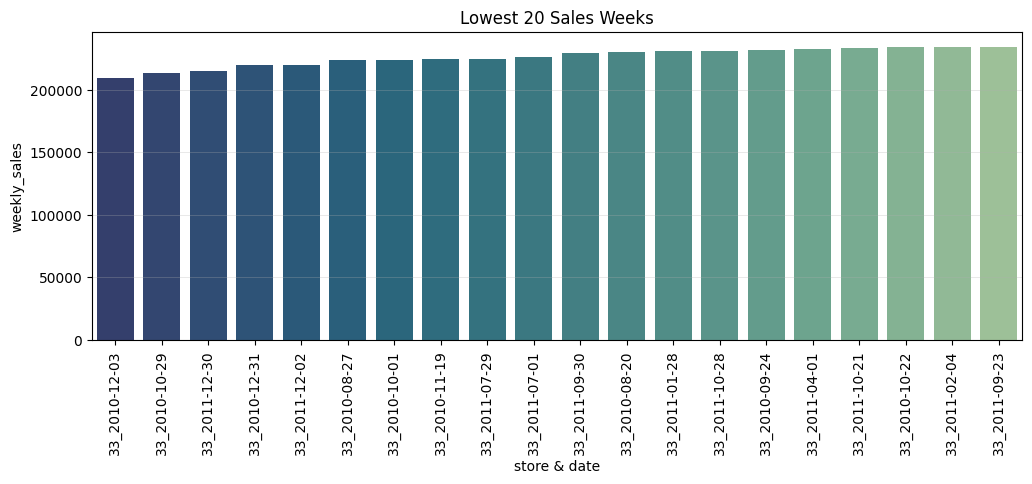

In [146]:
# Visualizing 20 lowest sales week

# Creating a dataframe of lowest 20 sales
lowest_20_sales = df[["date", "store","weekly_sales"]].sort_values(
    "weekly_sales"
).head(20).reset_index()

# We need store and the corresponding week on the x-axis
lowest_20_sales["store_date"] = lowest_20_sales["store"].astype(str)+"_"+lowest_20_sales["date"].astype(str)

plt.figure(figsize=(12,4))
sns.barplot(
    x="store_date", 
    y="weekly_sales", 
    data=lowest_20_sales,
    palette="crest_r"
)
plt.xlabel("store & date")
plt.ylabel("weekly_sales")
plt.title("Lowest 20 Sales Weeks")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.5, linewidth=0.4)
plt.show()

- **Store 33 consistently records lowest sales**
- **All 20 lowest sales week recorded are from store 33**
- **Store 33 also has the lowest total sum of sales**
- **This is the worst performing store**

In [141]:
store_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store              45 non-null     int64  
 1   weekly_sales_mean  45 non-null     float64
 2   weekly_sales_std   45 non-null     float64
 3   weekly_sales_min   45 non-null     float64
 4   weekly_sales_max   45 non-null     float64
 5   weekly_sales_sum   45 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.2 KB


## A. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [56]:
# Determining correlation between weekly sales and unemployment
correlations = []
for store in df["store"].unique():
    store_data = df[df["store"] == store]
    store_corr = store_data["weekly_sales"].corr(store_data["unemployment"])
    correlations.append({"store": store, "correlation": store_corr})

In [58]:
corr_df = pd.DataFrame(correlations)

In [60]:
corr_df = corr_df.sort_values(by="correlation", ascending=True)

In [62]:
# Top 5 stores that are negatively affected by unemployment
corr_df.head()

,store,correlation
37,38,-0.785290
43,44,-0.780076
38,39,-0.384681
41,42,-0.356355
40,41,-0.350630


In [64]:
# Top 5 stores that are positively affected by unemployment
corr_df.tail()

,store,correlation
29,30,0.201862
13,14,0.210786
20,21,0.218367
34,35,0.483865
35,36,0.833734


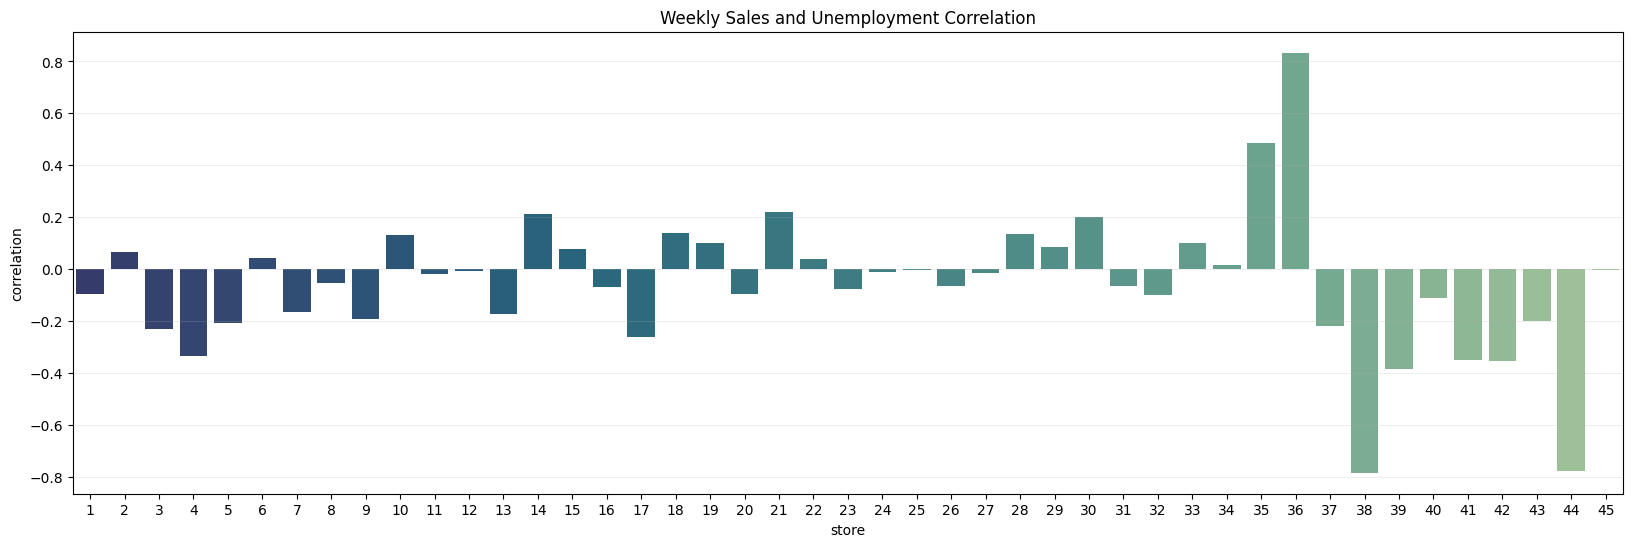

In [66]:
# Visualizing the stores sales and unemployment correlation
plt.figure(figsize=(20,6))
sns.barplot(
    x="store", 
    y="correlation", 
    data=corr_df,
    palette="crest_r"
)
plt.xlabel("store")
plt.ylabel("correlation")
plt.title("Weekly Sales and Unemployment Correlation")
plt.grid(axis="y", linewidth=0.4, alpha=0.4)
plt.show()

In [68]:
print("Stores affected most by unemployment rate \n")

print(corr_df.head(2))
print("\n Store 37 & 43 have the highest negative correlation")
print("\n That means as the unemployment rate increases, weekly sales decrease \n")

print(corr_df.tail(2))
print("\n Store 34 & 35 have the highest positive correlation")
print("\n That means as the unemployment rate increases, weekly sales also increase")


Stores affected most by unemployment rate 

    store  correlation
37     38    -0.785290
43     44    -0.780076

 Store 37 & 43 have the highest negative correlation

 That means as the unemployment rate increases, weekly sales decrease 

    store  correlation
34     35     0.483865
35     36     0.833734

 Store 34 & 35 have the highest positive correlation

 That means as the unemployment rate increases, weekly sales also increase


## B. If the weekly sales show a seasonal trend, when and what could be the reason?

In [78]:
# Aggregating the data for all the stores per week
weekly_sales_grp = df.groupby([df['date']]).agg(
    avg_weekly_sales=("weekly_sales", "mean"))

In [80]:
weekly_sales_grp.head()

,avg_weekly_sales
date,
2010-02-05,1.105572e+06
2010-02-12,1.074148e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06


In [76]:
weekly_sales_grp.shape

(143, 1)

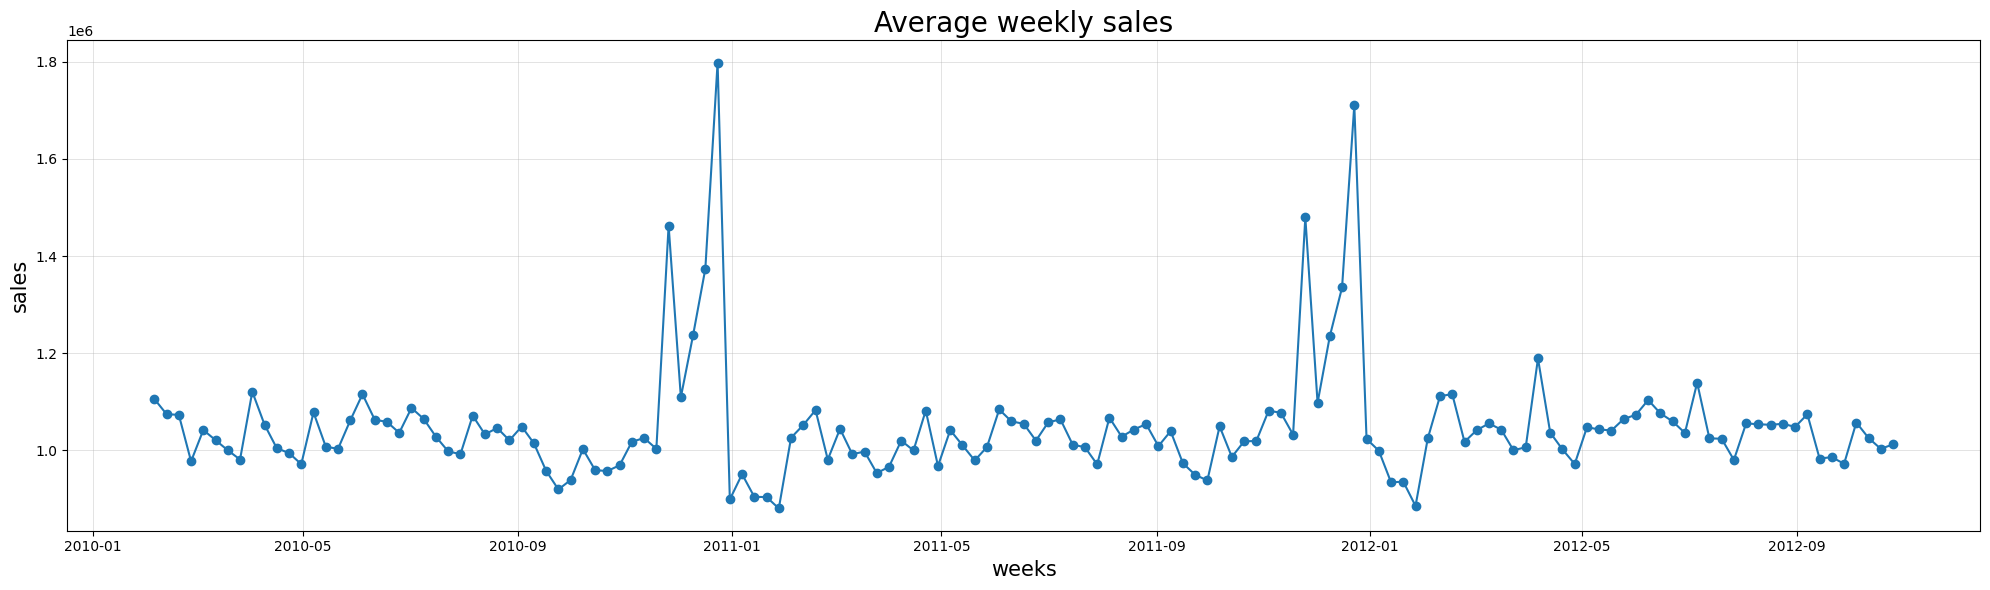

In [94]:
#Visualizing Average weekly sales over time
plt.figure(figsize=(20,6))
plt.plot(weekly_sales_grp, marker="o")
plt.xlabel("weeks", fontsize=15)
plt.ylabel("sales", fontsize=15)
plt.title("Average weekly sales", fontsize=20)
plt.grid(linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

In [102]:
#Creating year and month column
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

#Aggregating the data by year and month
ym_sales = df.groupby(["year", "month"]).agg(
    monthly_sales = ("weekly_sales", "mean")
).reset_index()

#Creating a date column from year and month
ym_sales["date"] = pd.to_datetime(ym_sales[["year", "month"]].assign(day=1))

#Drop the year and month column as they are no longer needed
ym_sales.drop(columns=["year", "month"], inplace=True)

#Assigning date as index column and dropping the date column
ym_sales.index = ym_sales["date"]
ym_sales.drop(columns=["date"], inplace=True)

ym_sales.head()

,monthly_sales
date,
2010-02-01,1.057405e+06
2010-03-01,1.010666e+06
2010-04-01,1.028499e+06
2010-05-01,1.037283e+06
2010-06-01,1.068034e+06


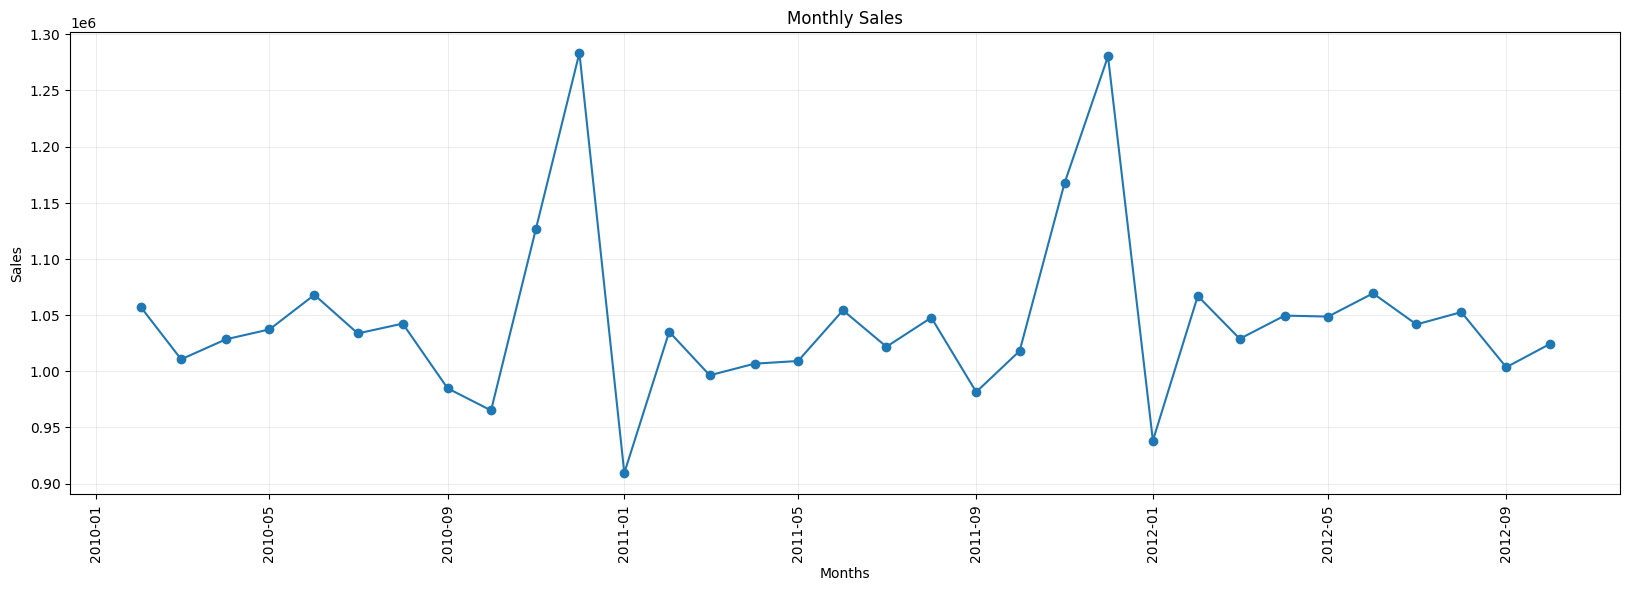

In [104]:
#Visualizing Monthly sales over time
plt.figure(figsize=(20,6))
plt.plot(ym_sales, marker="o")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Monthly Sales")
plt.grid(linewidth=0.4, alpha=0.4)
plt.xticks(rotation=90)
plt.show()

**From the monthly sales data, we can observe that the sales increase significantly in November and peak in December. This is the holiday season. With sales on offer during Black Friday, Thanksgiving, and Christmas, this comes as no surprise**

## c. Does temperature affect the weekly sales in any manner? 

In [108]:
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [110]:
# Aggregating data based on average temperature and average sales
date_grpby = df.groupby(["date"]).agg(
    avg_temperature=("temperature", "mean"), avg_sales=("weekly_sales", "mean")
).reset_index()

In [112]:
date_grpby.head()

,date,avg_temperature,avg_sales
0,2010-02-05,34.037333,1.105572e+06
1,2010-02-12,34.151333,1.074148e+06
2,2010-02-19,37.719778,1.072822e+06
3,2010-02-26,39.243556,9.770794e+05
4,2010-03-05,42.917333,1.041588e+06


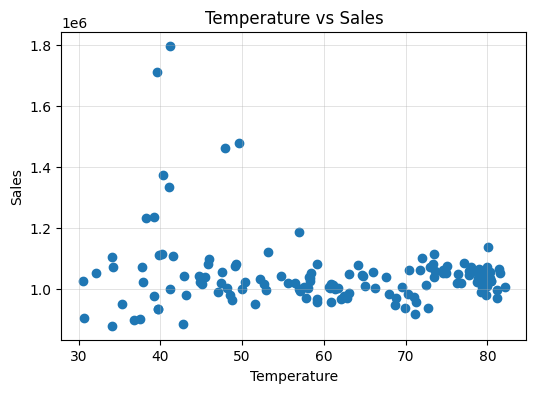

In [114]:
#Visualizing Temperature and Sales relationship
plt.figure(figsize=(6,4))
plt.scatter(x=date_grpby["avg_temperature"], y=date_grpby["avg_sales"])
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("Temperature vs Sales")
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

**From the above scatter plot, we can observe that sales remain constant more or less as the temperature increases. However, there are few exceptions around 40 and 50 degrees, as we observe the peak sales during these temperatures**

In [117]:
# Verify the correlation
date_grpby["avg_temperature"].corr(date_grpby["avg_sales"])

-0.15915988004722792

**The correlation is extremely weak(almost non-existent) as expected**

## D. How is the Consumer Price index affecting the weekly sales of various stores?

    store  correlation
37     38     0.812837
43     44     0.740150
38     39     0.428043
40     41     0.392293
41     42     0.360859
    store  correlation
42     43    -0.285686
29     30    -0.298188
13     14    -0.419755
34     35    -0.424107
35     36    -0.915095


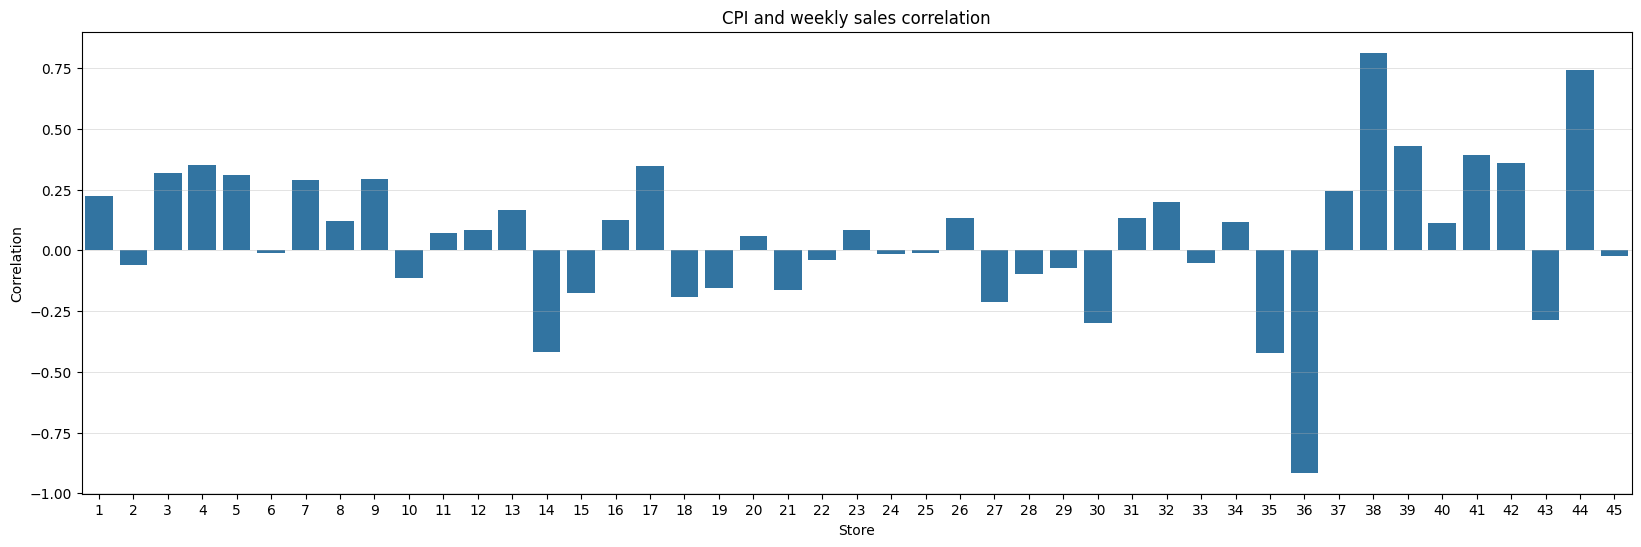

In [123]:
# Correlation of cpi and sales for each store
correlation = []
for store in df["store"].unique():
    df_store = df[df["store"]==store]
    cpi_corr = df_store["cpi"].corr(df_store["weekly_sales"])
    correlation.append({"store": store, "correlation": cpi_corr})

cpi_corr_df = pd.DataFrame(correlation).sort_values("correlation", ascending=False)

print(cpi_corr_df.head())
print(cpi_corr_df.tail())

#Visualizing correlation
plt.figure(figsize=(20,6))
sns.barplot(x="store", y="correlation", data=cpi_corr_df)
plt.xlabel("Store")
plt.ylabel("Correlation")
plt.title("CPI and weekly sales correlation")
plt.grid(axis="y", linewidth=0.5, alpha=0.5)
plt.show()

**There is a strong positive correlation between CPI and weekly sales for store 38 and a moderate positive correlation for store 44. This means as the cpi increases, sales also increase**

**Whereas store 36 strongly correlates negatively with CPI and weekly sales. That means as the cpi increases, sales decrease**

**For the remaining stores, there is not so strong correlation between cpi and weekly sales**



##  E. Top performing stores according to the historica data. 

##  F. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [126]:
# Top perfroming stores
top_stores = df.groupby(["store"]).agg(
    total_sales=("weekly_sales", "sum")
).reset_index().sort_values(
    "total_sales", ascending=False
)

In [128]:
# Top 5 best perfroming stores
best_stores = top_stores.head()
best_stores

,store,total_sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


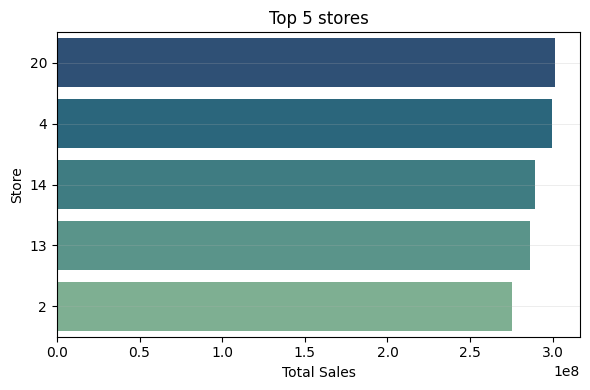

In [132]:
#Visualizing Top 5 stores and their sales
plt.figure(figsize=(6,4))
best_stores["store"] = best_stores["store"].astype("category")
sns.barplot(x=best_stores["total_sales"], y=best_stores["store"], order=best_stores["store"], palette="crest_r")
plt.xlabel("Total Sales")
plt.ylabel("Store")
plt.title("Top 5 stores")
plt.grid(axis="y", linewidth=0.4, alpha=0.4)
plt.tight_layout()
plt.show()

In [134]:
# The worst 5 performing stores
worst_stores = top_stores.tail()
worst_stores

,store,total_sales
37,38,55159626.42
35,36,53412214.97
4,5,45475688.90
43,44,43293087.84
32,33,37160221.96


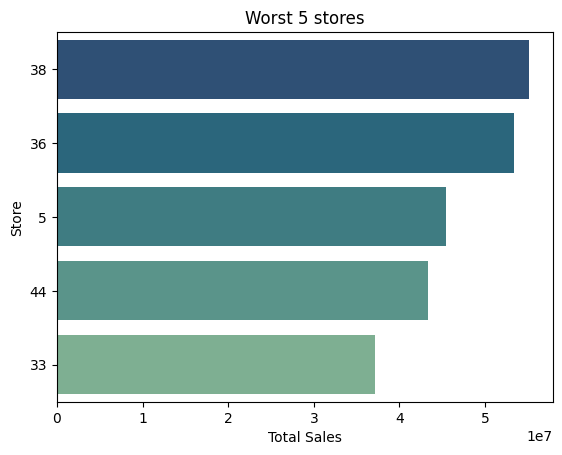

In [138]:
#Visualizing the 5 lowest performing stores
worst_stores["store"] = worst_stores["store"].astype("category")
sns.barplot(data=worst_stores, x="total_sales", y="store", order=worst_stores["store"], palette="crest_r")
plt.xlabel("Total Sales")
plt.ylabel("Store")
plt.title("Worst 5 stores")
plt.show()

In [140]:
# Difference in sales of the top 5 and the worst 5 stores
diff_sales = best_stores["total_sales"].sum() - worst_stores["total_sales"].sum()
print(f"Differnece in sales performance of the top 5 and the worst 5 stores is: {diff_sales}")

Differnece in sales performance of the top 5 and the worst 5 stores is: 1217340961.87


## Model Buliding Preprocess

**For model building we will need the date and the weekly_sales column. So we will store these columns in a new data frame**

In [144]:
# We have 45 stores. We will take input from the user on the store number
a = int(input("Enter store number:"))
store = df[df["store"]==a]

Enter store number: 1


In [146]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         143 non-null    int64         
 1   date          143 non-null    datetime64[ns]
 2   weekly_sales  143 non-null    float64       
 3   holiday_flag  143 non-null    int64         
 4   temperature   143 non-null    float64       
 5   fuel_price    143 non-null    float64       
 6   cpi           143 non-null    float64       
 7   unemployment  143 non-null    float64       
 8   year          143 non-null    int32         
 9   month         143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 11.2 KB


**For time series modeling, we need only the date and weekly_sales column and date column as index**

In [149]:
store = store.loc[:, ["date", "weekly_sales"]].set_index("date")

In [151]:
store.head()

,weekly_sales
date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


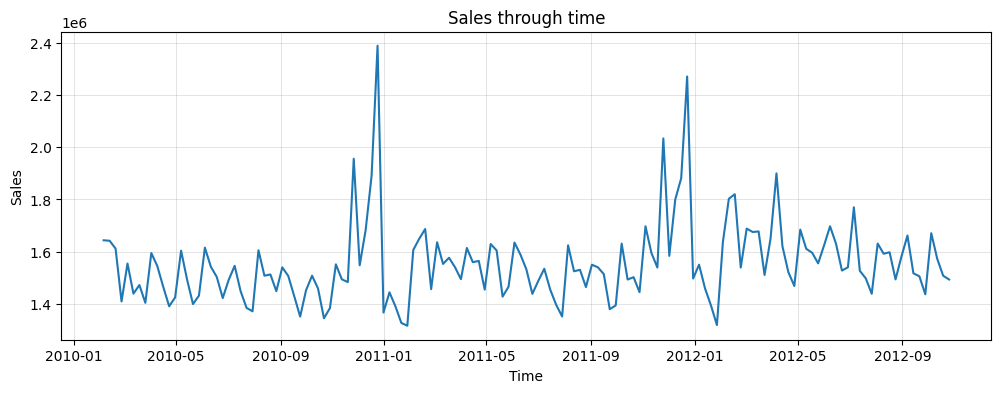

In [153]:
#Visualizing Sales through time
plt.figure(figsize=(12,4))
plt.plot(store["weekly_sales"])
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Sales through time")
plt.grid(linewidth=0.5, alpha=0.5)
plt.show()

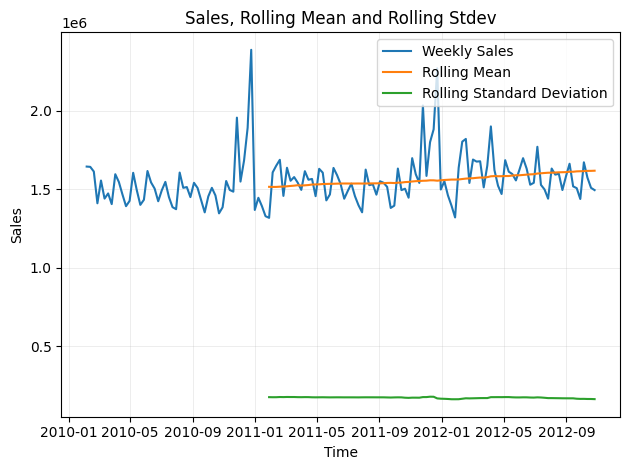

In [161]:
# Let us calculate the rolling mean and rolling standard deviation
rol_mean = store.rolling(window=52).mean().dropna()
rol_std = store.rolling(window=52).std().dropna()

plt.plot(store["weekly_sales"], label="Weekly Sales")
plt.plot(rol_mean, label="Rolling Mean")
plt.plot(rol_std, label="Rolling Standard Deviation")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend(loc="upper right")
plt.title("Sales, Rolling Mean and Rolling Stdev")
plt.grid(linewidth=0.4, alpha=0.4)
plt.tight_layout()
plt.show()

**For time series modeling we need mean as constant and standard deviation as 0. The mean just shows a gradual increase**
**We can also verify this with AdFuller Test**

In [163]:
from statsmodels.tsa.stattools import adfuller

In [165]:
def check_stationarity(timeseries):
    stationarity = adfuller(timeseries, autolag="AIC")
    print(f"ADF statistic: {stationarity[0]}")
    print(f"Pvalue: {stationarity[1]}")
    for key, value in stationarity[4].items():
        print("Critical values")
        print(f"{key}, {value}")
    print(f"lag value: {stationarity[2]}")
    print(f"nobs: {stationarity[3]}")

    if stationarity[1]<0.05:
        print("Series is stationary")
    else:
        print("series is not stationary")

In [167]:
check_stationarity(store)

ADF statistic: -5.102186145192288
Pvalue: 1.3877788330759434e-05
Critical values
1%, -3.47864788917503
Critical values
5%, -2.882721765644168
Critical values
10%, -2.578065326612056
lag value: 4
nobs: 138
Series is stationary


In [169]:
# Let's decompose the time series into trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

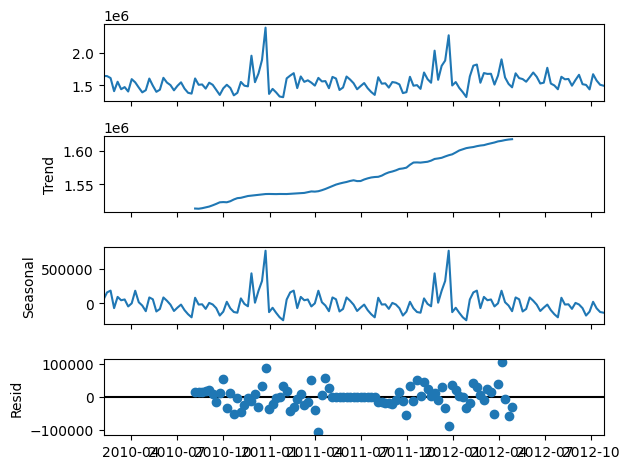

In [171]:
# Decomposition visualization
decomposition = seasonal_decompose(store, period=52)
decomposition.plot();

**Adfuller test shows the series is stationarity, however, our decomposition plot shows a trend. This is counter-intuitive. If the series is stationary, no trends can be observed but in this case, we observe the trend inspite of stationarity**

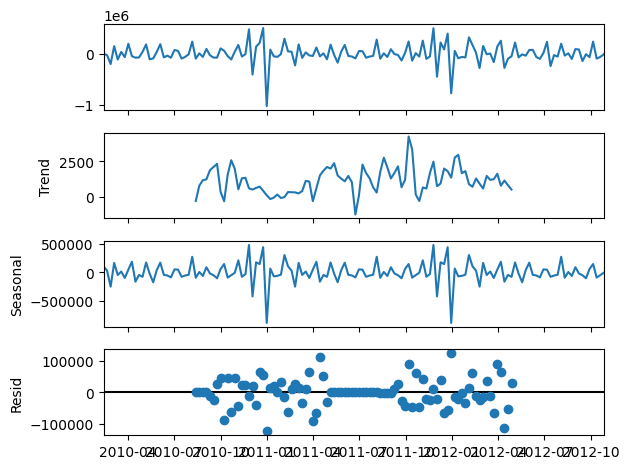

In [183]:
# We will do one differencing and observe the trend
store_diff = store.diff().dropna()

decompose = seasonal_decompose(store_diff, period=52)
decompose.plot();

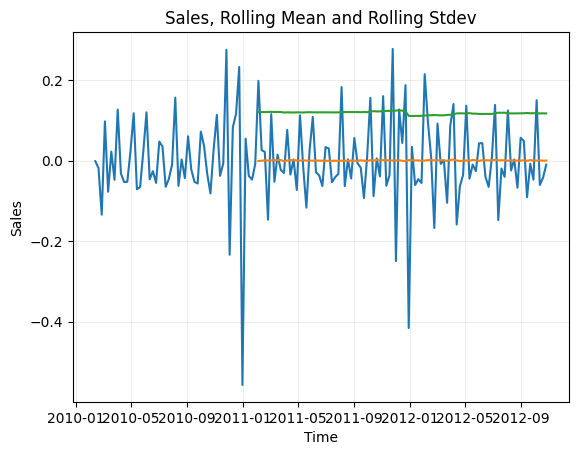

In [181]:
# Checking the rolling mean and standard deviaiton of differenced series
rol_mean = store_diff.rolling(window=52).mean().dropna()
rol_std = store_diff.rolling(window=52).std().dropna()

plt.plot(store_diff["weekly_sales"])
plt.plot(rol_mean)
plt.plot(rol_std)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Sales, Rolling Mean and Rolling Stdev")
plt.grid(linewidth=0.4, alpha=0.4)
plt.show()

**The decomposition plot after one differencing does not show any trend**

**However, our Adfuller test shows our original data is stationarity and no differencing is required to achieve the stationarity. We will use auto arima to determine the p,d, and q values. This will also provide us with the differencing required, if any. For the moment, we will take the original data as stationary, hence d=0 and proceed to determine the values of p and q**

In [189]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

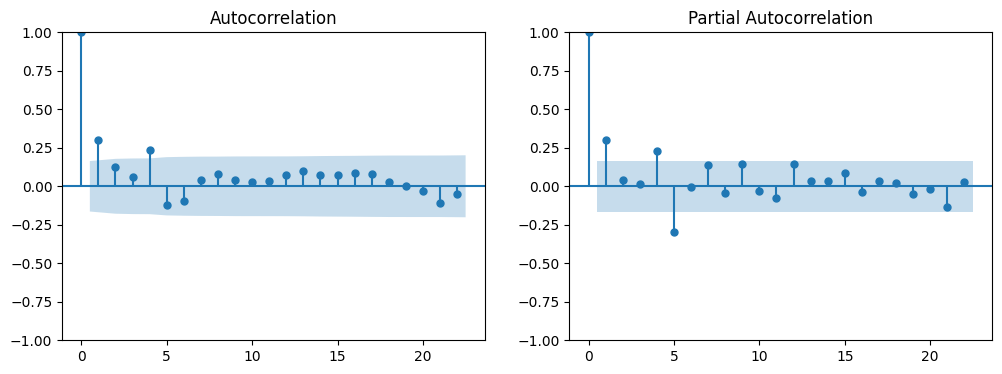

In [191]:
# Plotting acf and pacf plots to determine the values of p and q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

plot_acf(store, ax1)
plot_pacf(store, ax2)
plt.show()

- **For determing P, we use pacf plot. The pacf vlaue is significant at lag 1 and then dies down and it is again significant at lag 4**
- **For determining Q, we use acf plot. The acf value is significant at lag 1 and at lag 4**

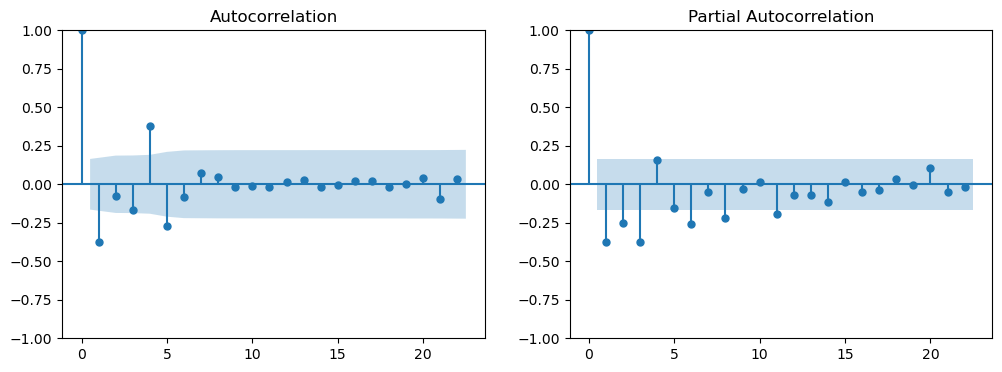

In [396]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

plot_acf(store_diff_2, ax1)
plot_pacf(store_diff_2, ax2)
plt.show()

In [194]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [196]:
#Determining p and q values via iteration
# From acf and pacf plots, we know that p and q values will lie generally in the range of (0,5)
# And we also know that differencing the series once will eliminate the trend, so we know d=1
d=1
p=q=range(0,5)
pq = list(itertools.product(p,q))
model_list=[]
for x in pq:
    comb = list(x)
    comb.insert(1,d)
    comb=tuple(comb)
    model_list.append(comb)
model_list    

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4)]

In [198]:
def arima_optimizer(data, pdq_range):
    best_aic = float('inf')
    best_order = None
    for order in pdq_range:
        try:
            model=ARIMA(data, order=order)
            result=model.fit()
            if result.aic<best_aic:
                best_aic, best_order = result.aic, order
        except:
            continue
    return best_order

In [200]:
best_arima = arima_optimizer(store, model_list)
print(f"Best arima model: {best_arima}")

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI w

Best arima model: (2, 1, 3)


**Best arima model predicted is (2,1,3) i.e p=2, d=1 and q=3**

**We will also use auto_arima to verify this**

In [204]:
from pmdarima import auto_arima

In [206]:
arima_model = auto_arima(store["weekly_sales"], seasonal=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3819.024, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.005, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3838.724, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3831.432, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.013, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3819.410, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3821.284, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3817.475, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3818.117, Time=0.13 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3810.990, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3809.486, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3810.431, Time=0.10 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3810.637, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

**By reconiling the acf-pacf plots, best order through itertools and auto_arima, all generate the same p,d,q values of (2,1,3).**

**Hence, we will take the order (2,1,3) for model building**

In [210]:
from statsmodels.tsa.arima.model import ARIMA

In [234]:
store.shape

(143, 1)

In [236]:
# Splitting the data into train and test
train = store[:120]
test = store[120:]

In [238]:
#Implementing ARIMA model
model = ARIMA(store, order=(2,1,3))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:           weekly_sales   No. Observations:                  143
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1897.843
Date:                Tue, 24 Jun 2025   AIC                           3807.686
Time:                        14:33:00   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [240]:
# Predicting the sales for test set
store["predict"] = result.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

<Axes: xlabel='date'>

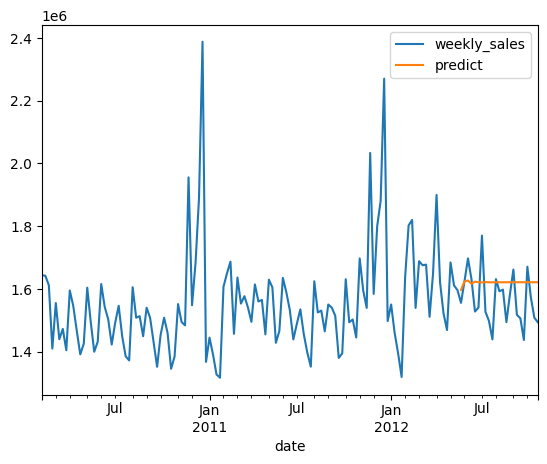

In [242]:
store[["weekly_sales", "predict"]].plot()

**ARIMA's predictions have been way off. We will implement SARIMAX now**

In [247]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [249]:
# Implement Sarimax
model_sarimax = SARIMAX(store["weekly_sales"], order=(2,1,3), seasonal_order=(2,1,3,52))
result_sarimax = model_sarimax.fit()
print(result_sarimax.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       weekly_sales   No. Observations:                  143
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 52)   Log Likelihood               -1140.461
Date:                            Tue, 24 Jun 2025   AIC                           2302.922
Time:                                    14:36:20   BIC                           2330.420
Sample:                                02-05-2010   HQIC                          2314.011
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3348      1.090      0.307      0.759      -1.802       2.471
ar.L2          0.1530      0.788   

In [251]:
# Predicting the sales for test set
store["predict"] = result_sarimax.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)

<Axes: xlabel='date'>

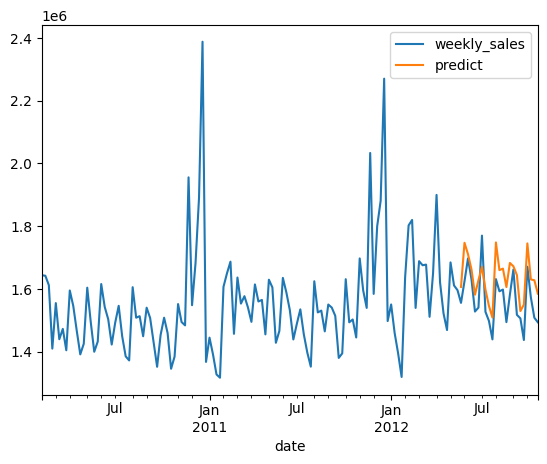

In [253]:
#Visualiing the predicted sales against actual sets
store[["weekly_sales", "predict"]].plot()

In [255]:
# Isolating the test set
prediction = store.iloc[120:]

In [257]:
prediction

,weekly_sales,predict
date,,
2012-05-25,1555444.55,1.606381e+06
2012-06-01,1624477.58,1.747055e+06
2012-06-08,1697230.96,1.710746e+06
2012-06-15,1630607.00,1.662248e+06
2012-06-22,1527845.81,1.581477e+06
2012-06-29,1540421.49,1.628080e+06
2012-07-06,1769854.16,1.670398e+06
2012-07-13,1527014.04,1.598001e+06
2012-07-20,1497954.76,1.545744e+06


In [259]:
#Calculating the mean square error of predicted sales
mse = (np.sum((prediction["predict"] - prediction["weekly_sales"])**2))/len(prediction)
print("Mean squared error is:", mse)

rmse = mse**0.5
print("Root Mean Squared error is:", rmse)

Mean squared error is: 6855290855.330803
Root Mean Squared error is: 82796.68384259603


In [275]:
avg_error = rmse*100/prediction["weekly_sales"].mean()
avg_error

5.278708351369967

**Average error of prediction is 5.28%**

<Axes: xlabel='date'>

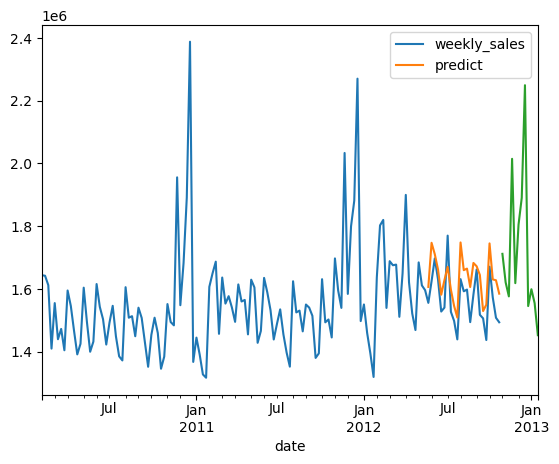

In [243]:
# Forecasting for the next 12 weeks
forecast = result_sarimax.forecast(steps=12)
store.plot()
forecast.plot()

In [244]:
forecast

2012-11-02    1.711799e+06
2012-11-09    1.620868e+06
2012-11-16    1.576180e+06
2012-11-23    2.014698e+06
2012-11-30    1.618342e+06
2012-12-07    1.804626e+06
2012-12-14    1.890240e+06
2012-12-21    2.249352e+06
2012-12-28    1.545341e+06
2013-01-04    1.599037e+06
2013-01-11    1.554590e+06
2013-01-18    1.452489e+06
Freq: W-FRI, Name: predicted_mean, dtype: float64

**Summary of insights**

* **Store 14 registered the highest single week sales ever while store 33 has the lowest single week sales ever**
* **Store 20 has the highest toal sales just eclipsing 30 Million USD followed closely by store 4. Store 33 has the lowest total sales at under 5 Million USD. Stores 44 and 5 are also languishing at the bottom with total sales less than 5 Million USD**
* **We can observe that the 20 highest sales recorded are in the month of December and November**
* **In fact, the 13 highest sales are from the month of December and the date is 23rd and 24th**
* **This does not come as a surprise as the sales are going to be at the highest during Christmas holidays**
* **Store 14 recorded the highest sales ever in the week of "2010-12-24"**
* **Store 33 consistently records lowest sales**
* **All 20 lowest sales week recorded are from store 33**
* **Store 33 also has the lowest total sum of sales**
* **This is the worst performing store**
* **From the monthly sales data, we can observe that the sales increase significantly in November and peak in December. This is the holiday season. With sales on offer during Black Friday, Thanksgiving, and Christmas, this comes as no surprise**